In [1]:
import datetime
import time
import sys
sys.path.append(r'/home/hengtian/lucy/factor-analyzer-v4/')
import pymysql
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import multiprocessing
import os
import queue

import datetime as dt


In [12]:
am10 = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/minute_1000_open.csv", index_col = 0)
am10 = am10['2018':'2021-06-22']
op = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/open_price.csv", index_col = 0)
op = op['2018':'2021-06-22']

In [130]:
ovngt = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/ovngt.csv", index_col = 0)
ovngt= ovngt['2018':'2021-06-22']
ov_er = ovngt[a]
ov_er['idx']=np.nanmean(ov_er,axis=1)

<ipython-input-130-03e7aee5c451>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ov_er['idx']=np.nanmean(ov_er,axis=1)


In [142]:
am1030 = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/minute_1030_open.csv",index_col=0)
am1030 = am1030['2018':'2021-06-22']
am1030_rv =am1030[ovlp]
dic1 = dict(zip(am1030_rv.columns,op_rv.columns))
am1030_rv=am1030_rv.rename(dic1,axis = 'columns')

In [156]:
pm_13= pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/second_130000_sell_price.csv",index_col =0)
pm_13 = pm_13['2018':'2021-06-22']
pm_13_rv= pm_13[a]

In [158]:
am1130_er = pm_13_rv /am1030_rv-1
am1130_er['idx'] = np.nanmean(am1130_er,axis=1)

In [166]:
pm_1330 = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/minute_1330_open.csv",index_col=0)
pm_1330 = pm_1330['2018':'2021-06-22']
pm_1330_rv =pm_1330[ovlp]
dic2= dict(zip(pm_1330_rv.columns,op_rv.columns))
pm_1330_rv=pm_1330_rv.rename(dic2,axis = 'columns')

In [176]:
pm14 = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/minute_1400_open.csv",index_col=0)
pm14=pm14['2018':'2021-06-22']
pm14_rv = pm14[ovlp]
dic3=dict(zip(pm14_rv.columns,op_rv.columns))
pm14_rv=pm14_rv.rename(dic3,axis = 'columns')

In [183]:
pm1430 = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/minute_1430_open.csv",index_col=0)
pm1430=pm1430['2018':'2021-06-22']
pm1430_rv = pm1430[ovlp]
dic4=dict(zip(pm1430_rv.columns,op_rv.columns))
pm1430_rv=pm1430_rv.rename(dic4,axis = 'columns')

In [200]:
close = pd.read_csv("/home/hengtian/lucy/factor_service/basic_data/close_price.csv",index_col=0)
close = close['2018':'2021-06-22']
close_rv = close[a]
close_er = close_rv/pm1430_rv-1
close_er['idx']=np.nanmean(close_er,axis=1)

In [128]:
#数据整合：选出相同的column，重命名
stocks = [col[:6] for col in op.columns]
ovlp = [col for col in stocks if col in am10.columns]
a = [col for col in op.columns if col[:6] in am10.columns]

In [16]:
am10_rv = am10[ovlp]
op_rv = op[a]

In [17]:
dic = dict(zip(am10_rv.columns,op_rv.columns))
am10_rv = am10_rv.rename(dic,axis = 'columns')

In [113]:
#所有股票前半小时的收益率和大盘收益率
am10_er = am10_rv/op_rv-1
am10_er['idx'] = np.nanmean(am10_er,axis=1)

In [143]:
#所有股票10点到10点半的收益率和大盘收益率
am1030_er = am1030_rv/am10_rv-1
am1030_er['idx'] = np.nanmean(am1030_er,axis =1)

In [167]:
#所有股票13点到13点半的收益率和大盘收益率
pm1330_er = pm_1330_rv/pm_13_rv-1
pm1330_er['idx'] = np.nanmean(pm1330_er,axis =1)

In [177]:
#所有股票13点半到14点的收益率和大盘收益率
pm14_er = pm14_rv/pm_1330_rv-1
pm14_er['idx'] = np.nanmean(pm14_er,axis =1)

In [186]:
#所有股票14点到14点半的收益率和大盘收益率
pm1430_er = pm1430_rv/pm14_rv-1
pm1430_er['idx'] = np.nanmean(pm1430_er,axis =1)

In [186]:
#所有股票14点到14点半的收益率和大盘收益率
pm1430_er = pm1430_rv/pm14_rv-1
pm1430_er['idx'] = np.nanmean(pm1430_er,axis =1)

In [207]:
#上午下午总体收益率
am_chg = pm_13_rv/op_rv-1
pm_chg =close_rv/pm_13_rv-1

In [211]:
pm_chg.to_csv("pm_chg.csv")

In [ ]:
test = am10_er['000006.XSHE']
tt = test.iloc[40:60]
t_i =am10_er['idx'].iloc[40:60]
t_i[tt.isnull()==True]=np.nan
# t_i[a]= np.nan
# np.corrcoef(tt.dropna(), t_i.dropna())[0,1]

In [201]:
#滚动20天，计算过去20天中个股和大盘之间的correlation，然后取correlation的平均值作为当天的correlation
def corr(stock,q):
    i = 20
    cor = np.full(len(close_er),np.nan)
    stock_er = close_er[stock]
    idx_er = close_er['idx']
    while i<len(close_er):
        s_er =stock_er.iloc[i-20:i]
        s_ier = idx_er.iloc[i-20:i]
        if len(s_er.dropna())<20:
            i+=1
#         elif len(s_er.dropna())!=20:
#             s_ier[s_er.isnull()==True]=np.nan
#             print(stock)
#             print(s_er.dropna())
#             print(s_ier.dropna())
#             cor[i] = np.corrcoef(s_er.dropna(), s_ier.dropna())[0,1]
#             break
#             i+=1
        else:
            cor[i]=np.corrcoef(s_er,s_ier)[0,1]
            i+=1
    return q.put({stock:cor})

In [202]:
q = multiprocessing.Manager().Queue()
param = []
col =close_er.columns[:-1]
for stock in col:
    param.append((stock,q))
# print(param)
#task
with multiprocessing.Pool(processes =4) as pool:
    pool.starmap(corr,param)

#extract
elements = []
while q.qsize():
    elements.append(q.get())

In [203]:
d = pd.DataFrame(np.empty((len(close_er),len(col)),dtype=object),columns = col, index = close_er.index)
for i in range(len(elements)):
    stock = list(elements[i].keys())[0]
    val = list(elements[i][stock])
    d[stock]=val

In [204]:
d['idx'] =np.nanmean(d,axis=1)

<ipython-input-204-a07a0c350d8c>:1: RuntimeWarning: Mean of empty slice
  d['idx'] =np.nanmean(d,axis=1)


<AxesSubplot:>

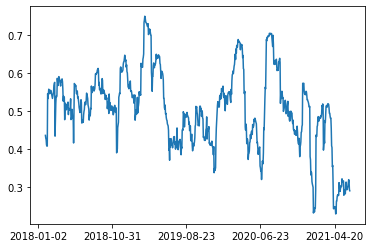

In [205]:
d['idx'].plot()

In [206]:
d.to_csv("pm15_correlation.csv")

In [165]:
pm_13_rv.to_csv("pm13_revised.csv")